In [2]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
#import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
EURGBP_data = pd.read_csv("EURGBP.csv", parse_dates=[0] ,names=["DateTime", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"] ) 
EURUSD_data = pd.read_csv("EURUSD.csv", parse_dates=[0] ,names=["DateTime", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]) 
GBPUSD_data = pd.read_csv("GBPUSD.csv", parse_dates=[0] ,names=["DateTime", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]) 

In [4]:
EURGBP_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2013-01-01 17:00:00,0.81201,0.81201,0.81198,0.81200,0
1,2013-01-01 17:01:00,0.81199,0.81203,0.81199,0.81202,0
2,2013-01-01 17:03:00,0.81203,0.81248,0.81202,0.81248,0
3,2013-01-01 17:04:00,0.81284,0.81291,0.81284,0.81291,0
4,2013-01-01 17:05:00,0.81290,0.81299,0.81219,0.81219,0
...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,0.83060,0.83060,0.83059,0.83059,0
364908,2013-12-31 15:56:00,0.83058,0.83062,0.83056,0.83062,0
364909,2013-12-31 15:57:00,0.83063,0.83070,0.83062,0.83070,0
364910,2013-12-31 15:58:00,0.83066,0.83073,0.83066,0.83071,0


In [5]:
EURUSD_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2013-01-01 17:00:00,1.32041,1.32041,1.32034,1.32034,0
1,2013-01-01 17:01:00,1.32039,1.32046,1.32034,1.32046,0
2,2013-01-01 17:03:00,1.32049,1.32050,1.32009,1.32025,0
3,2013-01-01 17:04:00,1.32023,1.32025,1.32023,1.32025,0
4,2013-01-01 17:05:00,1.32027,1.32028,1.32026,1.32026,0
...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,1.37588,1.37588,1.37579,1.37579,0
364908,2013-12-31 15:56:00,1.37576,1.37580,1.37576,1.37578,0
364909,2013-12-31 15:57:00,1.37577,1.37578,1.37565,1.37567,0
364910,2013-12-31 15:58:00,1.37574,1.37574,1.37562,1.37569,0


In [6]:
GBPUSD_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2013-01-01 17:00:00,1.62559,1.62559,1.62553,1.62553,0
1,2013-01-01 17:01:00,1.62554,1.62555,1.62527,1.62527,0
2,2013-01-01 17:03:00,1.62556,1.62556,1.62405,1.62405,0
3,2013-01-01 17:04:00,1.62475,1.62475,1.62365,1.62385,0
4,2013-01-01 17:05:00,1.62383,1.62408,1.62345,1.62366,0
...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,1.65623,1.65623,1.65614,1.65614,0
364908,2013-12-31 15:56:00,1.65616,1.65619,1.65602,1.65605,0
364909,2013-12-31 15:57:00,1.65601,1.65602,1.65575,1.65575,0
364910,2013-12-31 15:58:00,1.65574,1.65581,1.65574,1.65575,0


# Prediction

In [7]:
#for every single stock prediction we look 60 minutes back, collect the values in the column that are in this range, and get the average/min/max/sum/standard deviation of the values     
EURGBP_data['OpenMean'] = EURGBP_data['OPEN'].rolling(60).mean()
EURGBP_data['OpenMin'] = EURGBP_data['OPEN'].rolling(60).min()   
EURGBP_data['OpenMax'] = EURGBP_data['OPEN'].rolling(60).max()   
EURGBP_data['OpenStd'] = EURGBP_data['OPEN'].rolling(60).std()    
EURGBP_data['OpenSum'] = EURGBP_data['OPEN'].rolling(60).sum()

#drop the first entries that are NaN values for the stats
EURGBP_data = EURGBP_data.dropna()

EURGBP_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME,OpenMean,OpenMin,OpenMax,OpenStd,OpenSum
59,2013-01-01 18:02:00,0.81234,0.81234,0.81234,0.81234,0,0.812638,0.81199,0.81294,0.000222,48.75829
60,2013-01-01 18:03:00,0.81236,0.81245,0.81236,0.81245,0,0.812644,0.81199,0.81294,0.000209,48.75864
61,2013-01-01 18:04:00,0.81244,0.81245,0.81244,0.81245,0,0.812651,0.81203,0.81294,0.000193,48.75909
62,2013-01-01 18:05:00,0.81244,0.81248,0.81240,0.81247,0,0.812658,0.81223,0.81294,0.000177,48.75950
63,2013-01-01 18:06:00,0.81246,0.81246,0.81227,0.81231,0,0.812652,0.81223,0.81294,0.000177,48.75912
...,...,...,...,...,...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,0.83060,0.83060,0.83059,0.83059,0,0.830122,0.82986,0.83079,0.000258,49.80729
364908,2013-12-31 15:56:00,0.83058,0.83062,0.83056,0.83062,0,0.830118,0.82986,0.83072,0.000250,49.80708
364909,2013-12-31 15:57:00,0.83063,0.83070,0.83062,0.83070,0,0.830117,0.82986,0.83063,0.000247,49.80699
364910,2013-12-31 15:58:00,0.83066,0.83073,0.83066,0.83071,0,0.830118,0.82986,0.83066,0.000251,49.80710


In [8]:
# X features: (OpenMean, OpenMin, OpenMax, OpenStd, OpenSum)
# y: Close price
X = EURGBP_data.iloc[:, [6,7,8,9,10]].values 
y = EURGBP_data.iloc[:, 4].values

In [9]:
from sklearn.model_selection import TimeSeriesSplit

#Split data into test and training sets
splits = TimeSeriesSplit(n_splits=5)

for train_index, test_index in splits.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    print('X Observations: %d' % (len(X_train) + len(X_test)))
    print('Training Observations: %d' % (len(X_train)))
    print('Testing Observations: %d' % (len(X_test)))
    print('\n')
    print('y Observations: %d' % (len(y_train) + len(y_test)))
    print('Training Observations: %d' % (len(y_train)))
    print('Testing Observations: %d' % (len(y_test)))
    print('--------------/\n')

X Observations: 121621
Training Observations: 60813
Testing Observations: 60808


y Observations: 121621
Training Observations: 60813
Testing Observations: 60808
--------------/

X Observations: 182429
Training Observations: 121621
Testing Observations: 60808


y Observations: 182429
Training Observations: 121621
Testing Observations: 60808
--------------/

X Observations: 243237
Training Observations: 182429
Testing Observations: 60808


y Observations: 243237
Training Observations: 182429
Testing Observations: 60808
--------------/

X Observations: 304045
Training Observations: 243237
Testing Observations: 60808


y Observations: 304045
Training Observations: 243237
Testing Observations: 60808
--------------/

X Observations: 364853
Training Observations: 304045
Testing Observations: 60808


y Observations: 364853
Training Observations: 304045
Testing Observations: 60808
--------------/



## Baseline models

### Linear Regression

In [10]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

#### Ordinary Least Squares

In [11]:
#Create linear regression object (Ordinary Least Squares)
regr = linear_model.LinearRegression()

#Train the model using the training set
regr.fit(X_train, y_train)


#Model Evaluation 

#making predictions using the testing set
y_pred = regr.predict(X_test)

# r-squared score 
r2 = r2_score(y_test, y_pred)

#mean squared error
mse = mean_squared_error(y_test, y_pred)

# root mean squared error 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("<Linear Regression - Model Performance>")
print("\n")
print('Mean squared error is {}'.format(mse))
print("\n")
print('Root mean squared error is {}'.format(rmse))
print("\n")
print('R2 score is {}'.format(r2)) #1 is perfect prediction
print("\n")
print('Mean squared log error: ', metrics.mean_squared_log_error(y_test, y_pred))
print("\n")
print('Coefficients:\n', regr.coef_)
print("\n")
#the intercept : The intercept coefficient is the price at which the closing price measurement started, the stock price value at date zero
print('Intercept: ', regr.intercept_)

<Linear Regression - Model Performance>


Mean squared error is 1.326116431680534e-07


Root mean squared error is 0.000364158815859308


R2 score is 0.9959920022370684


Mean squared log error:  3.929877379264364e-08


Coefficients:
 [ 6.75645309e+05  7.48817269e-01  6.83679687e-01  4.73440766e-02
 -1.12607624e+04]


Intercept:  0.00086413878149183


In [12]:
#print the actual output values for the X_test and the predicted values
print("\n<The Actual output values vs Predicted values for the test data>")
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)


<The Actual output values vs Predicted values for the test data>
        Actual  Predicted
0      0.85673   0.856683
1      0.85675   0.856679
2      0.85675   0.856691
3      0.85675   0.856688
4      0.85667   0.856685
...        ...        ...
60803  0.83059   0.830437
60804  0.83062   0.830390
60805  0.83070   0.830329
60806  0.83071   0.830349
60807  0.83062   0.830361

[60808 rows x 2 columns]


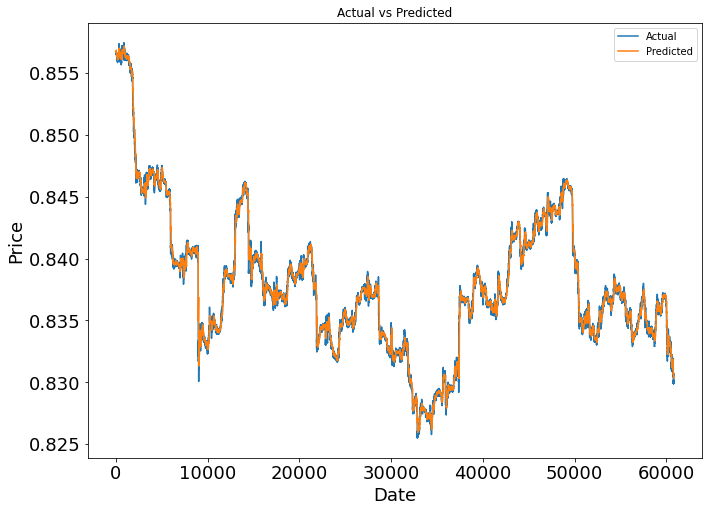

In [13]:
##fig, ax = plt.subplots()
plt.figure(figsize = (11,8))
plt.plot(y_test)
plt.plot(y_pred)
plt.title('Actual vs Predicted')
#xtick_loc = [0.166, 0.33, 0.50, 0.66, 0.82 ]

#plt.xticks(xticklabels)
plt.ylabel('Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

#### MLPRegressor

In [14]:
from sklearn.neural_network import MLPRegressor

#Create MLPregressor object
mlp_regr = MLPRegressor()
mlp_regr.fit(X_train, y_train)

#making predictions using the testing set
predicted_y = mlp_regr.predict(X_test)

# r-squared score 
r2_ = r2_score(y_test, predicted_y)

#mean squared error
mse_ = mean_squared_error(y_test, predicted_y)

# root mean squared error 
rmse_ = np.sqrt(mean_squared_error(y_test, predicted_y))


print("<Mulit-Layer Perceptron Regressor - Model Performance>")
print("\n")
print('Mean squared error is {}'.format(mse_))
print("\n")
print('Root mean squared error is {}'.format(rmse_))
print("\n")
print('R2 score is {}'.format(r2_)) 
print("\n")
print('Mean squared log error: ', metrics.mean_squared_log_error(y_test, predicted_y))

<Mulit-Layer Perceptron Regressor - Model Performance>


Mean squared error is 1.8044277147182663e-06


Root mean squared error is 0.001343289884841789


R2 score is 0.9454637460845153


Mean squared log error:  5.328099750565131e-07


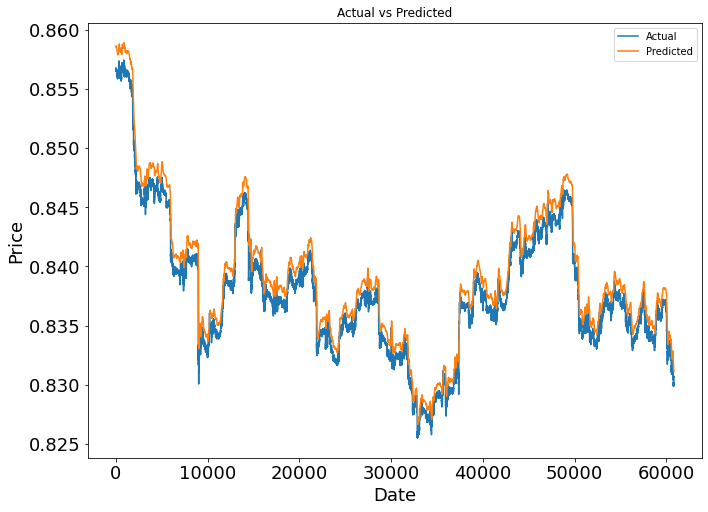

In [15]:
plt.figure(figsize = (11,8))
plt.plot(y_test)
plt.plot(predicted_y)
plt.title('Actual vs Predicted')
#plt.xticks(EURGBP_data.DateTime)
plt.ylabel('Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

### ARIMA

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
warnings.filterwarnings('ignore')

X = EURGBP_data.iloc[:, 4].values 
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

# fit model
#lag value to 5 for autoregression,difference order of 1 to make the time series stationary, moving average model of 0
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               240802
Model:                 ARIMA(5, 1, 0)   Log Likelihood             1834043.604
Date:                Thu, 18 Aug 2022   AIC                       -3668075.208
Time:                        23:29:07   BIC                       -3668012.857
Sample:                             0   HQIC                      -3668057.003
                             - 240802                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0389   1.66e-21  -2.34e+19      0.000      -0.039      -0.039
ar.L2         -0.0173   1.25e-21  -1.39e+19      0.000      -0.017      -0.017
ar.L3         -0.0110    8.9e-22  -1.23e+19      0.0

In [26]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions against the test set
predictions = model_fit.predict(start, end)

In [29]:
#mean squared error
arima_mse = mean_squared_error(test, predictions)

# root mean squared error 
arima_rmse = np.sqrt(mean_squared_error(test, predictions))

# r-squared score 
arima_r2 = r2_score(test, predictions)

print(arima_mse)
print(arima_rmse)
print(arima_r2)

0.0004371228213711114
0.020907482425464606
-8.40469397659547


### LSTM keras


# LSTM baseline model run in separate notebook!

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout


# #When implementing LSTM, need to reshape X train/test to be 3 dimensional -> (batch_size, time_step, feature dimesion)
# #The 1 in the last parameter below is the time step
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# #Create LSTM model and fit
# LSTM_model = Sequential()
# #1st layer
# LSTM_model.add(LSTM(units = 50, activation='relu',,  input_shape = (X_train.shape[1], 1)))
# # units: number of LSTM neurons in the layer. 50 neurons will give the model high dimensionality, enough to capture the upwards and downward trends. 

# #The output dimension is 1 since we are predicting 1 price each time.
# LSTM_model.add(Dense(units = 1))
# #Compiling the LSTM model
# LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# #Train the model using the training set
# LSTM_model.fit(X_train, y_train, epochs = 50, batch_size = 32)

# # make predictions
# trainPredict = LSTM_model.predict(X_train)
# testPredict = LSTM_model.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score

# mse = (mean_squared_error(y_train, trainPredict[:,0])
# rmse = np.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
# r2 = r2_score(y_train, trainPredict[:,0])
# print('Train set: %.2f RMSE' % (rmse))
# print('%.2f MSE' % (mse))
# print('%.2f R2' % (r2)

# mse2 = mean_squared_error(y_test, testPredict[:,0])
# rmse2 = np.sqrt(mean_squared_error(y_test, testPredict[:,0]))
# r2 = r2_score(y_test, testPredict[:,0])
# print('Test set: %.2f RMSE' % (rmse2))
# print('%.2f MSE' % (mse2))
# print('%.2f R2 ' % (r2))